# Logistic Regression 

Logistic Regression model estimated probability (vectorized form): $$\hat {p} = h_{\theta}(x)= \sigma (\theta^T.x) $$

Logistic function: $$\sigma(t) = \frac 1{1+exp(-t)}$$

We apply sigmoid function on top of linear equation: $$\sigma(t) = \frac 1{1+exp(-(m*x+b))}$$

In [17]:
import math
math.e

2.718281828459045

$$\hat y = 0 if \hat p < 0.5$$
$$\hat y = 1 if \hat p >= 0.5$$

## Binary classification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Owner/py/ML/7_logistic_reg/insurance_data.csv")

In [4]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

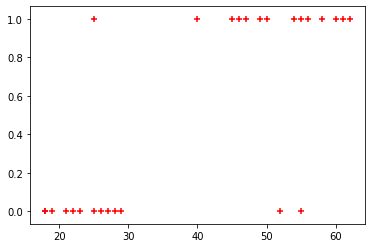

In [18]:
plt.scatter(x= df.age, y = df.bought_insurance, marker = "+", color = "red" )
# as people become older they are likely get insurance

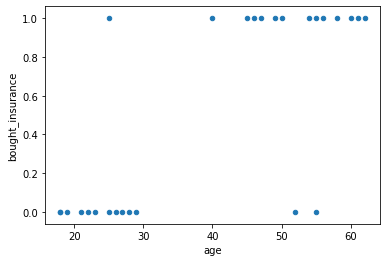

In [14]:
df.plot.scatter("age", "bought_insurance")

### Split data to train and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[["age"]]
y = df[["bought_insurance"]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [22]:
X_test

,age
6,55
26,23
9,61


### Set an Logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression

### create object of this class

In [24]:
logm = LogisticRegression()

### Train the mode

In [26]:
logm.fit(X_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [27]:
logm.predict(X_test)

array([1, 0, 1], dtype=int64)

### Accuracy of model-score

In [28]:
logm.score(X_test, y_test)

0.6666666666666666

In [29]:
logm.predict_proba(X_test) #1st customer will  but insurance (0.95)

array([[0.04081248, 0.95918752],
       [0.90521233, 0.09478767],
       [0.01518487, 0.98481513]])

In [32]:
logm.predict([[20]]) #age 20 will not buy product

array([0], dtype=int64)

## Exercise

Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [65]:
df = pd.read_csv("C:/Users/Owner/py/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")

In [66]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [67]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [68]:
df.rename({'satisfaction_level': "satis", 'last_evaluation':"lastEval", 'number_project':"numPro",
       'average_montly_hours':"meanHours", 'time_spend_company':"time", 'Work_accident':"accident","left":"left",
       'promotion_last_5years':"promotion", 'Department':"dep", "salary":"salary"}, inplace = True, axis=1)

In [69]:
df.head()

,satis,lastEval,numPro,meanHours,time,accident,left,promotion,dep,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [70]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [125]:
df.groupby(by = "left").mean()

,satis,lastEval,numPro,meanHours,time,accident,promotion,dep,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.739237,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.555587,1.414730


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   satis      14999 non-null  float64
 1   lastEval   14999 non-null  float64
 2   numPro     14999 non-null  int64  
 3   meanHours  14999 non-null  int64  
 4   time       14999 non-null  int64  
 5   accident   14999 non-null  int64  
 6   left       14999 non-null  int64  
 7   promotion  14999 non-null  int64  
 8   dep        14999 non-null  object 
 9   salary     14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [72]:
df.describe()

,satis,lastEval,numPro,meanHours,time,accident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [73]:
df.dep.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dep, dtype: int64

In [74]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [75]:
df.dep = df.dep.map({"sales":1, "technical":2, "support":3, 
                     "IT":4, "product_mng":5, "marketing":6, 
                     "RandD":7, "accounting":8, "hr":9, "management":10})
df.head()

,satis,lastEval,numPro,meanHours,time,accident,left,promotion,dep,salary
0,0.38,0.53,2,157,3,0,1,0,1,low
1,0.80,0.86,5,262,6,0,1,0,1,medium
2,0.11,0.88,7,272,4,0,1,0,1,medium
3,0.72,0.87,5,223,5,0,1,0,1,low
4,0.37,0.52,2,159,3,0,1,0,1,low


In [76]:
df.dep.value_counts().sort_values(ascending = False)

1     4140
2     2720
3     2229
4     1227
5      902
6      858
7      787
8      767
9      739
10     630
Name: dep, dtype: int64

In [77]:
df.salary = df.salary.map({"low": 1, "medium":2, "high":3})
df.head()

,satis,lastEval,numPro,meanHours,time,accident,left,promotion,dep,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [78]:
df.salary.value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [87]:
df.corr()["left"].sort_values()

satis       -0.388375
salary      -0.157898
accident    -0.154622
promotion   -0.061788
dep         -0.028394
lastEval     0.006567
numPro       0.023787
meanHours    0.071287
time         0.144822
left         1.000000
Name: left, dtype: float64

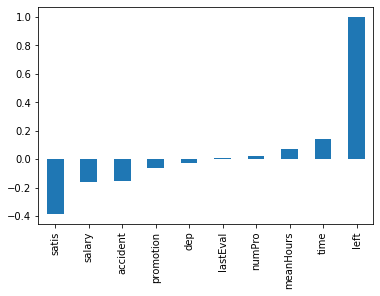

In [86]:
df.corr()["left"].sort_values().plot(kind = "bar")

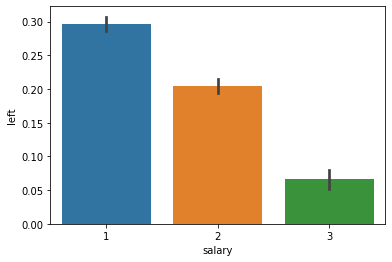

In [91]:
#plt.bar(x = df.salary, height = df.left)
sns.barplot(df.salary, df.left)

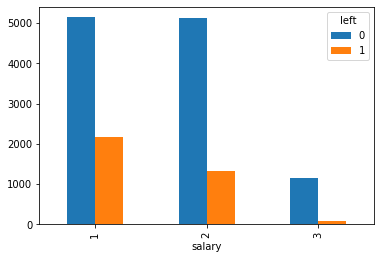

In [128]:
pd.crosstab(df.salary, df.left).plot(kind = "bar")#Above bar chart shows employees with high salaries are likely to not leave the company

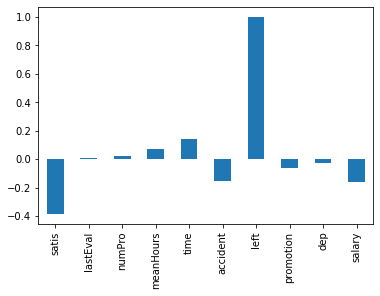

In [96]:
df.corr()["left"].plot(kind = "bar")

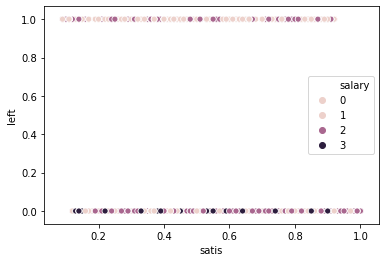

In [105]:
sns.scatterplot(x = df.satis, y = df.left, hue =df.salary)

In [99]:
X = df[["satis", "salary", "accident", "time"]]
y = df.left

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.2)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
logm = LogisticRegression()

In [108]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
logm.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [112]:
logm.score(X_test, y_test)

0.7791482623551963

In [113]:
df.iloc[0]

satis          0.38
lastEval       0.53
numPro         2.00
meanHours    157.00
time           3.00
accident       0.00
left           1.00
promotion      0.00
dep            1.00
salary         1.00
Name: 0, dtype: float64

In [116]:
df.satis.mean()

0.6128335222348166

In [123]:
logm.predict([[0.01, 2, 1, 10]])

array([1], dtype=int64)

## Multiclass Classification

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.data[0]# data ara imagesi but images are (8x8) represented as one dimensional array. 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

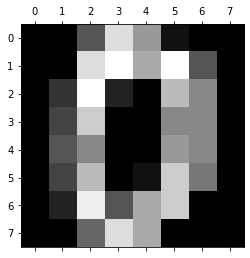

In [11]:
plt.gray()
plt.matshow(digits.images[0])

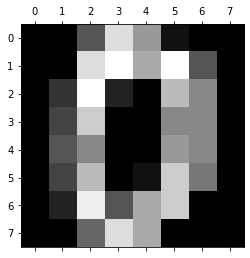

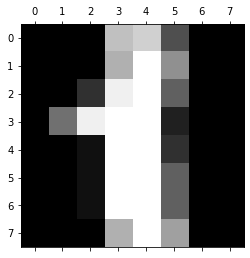

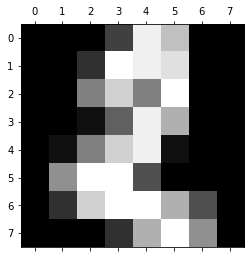

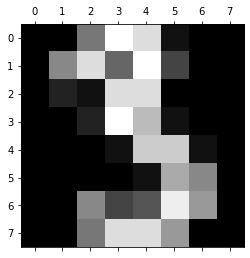

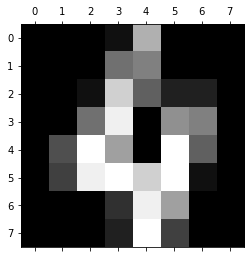

In [14]:
for i in digits.images[:5]:
    plt.matshow(i)    

In [16]:
digits.target[:5]#these say what number is in flu

array([0, 1, 2, 3, 4])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = digits.data
y = digits.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
len(X_train)

1437

### Model creation

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logm = LogisticRegression() # MODEL OBJECT

In [24]:
logm.fit(X_train, y_train) # training the model with fit method

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logm.score(X_test, y_test)

0.9611111111111111

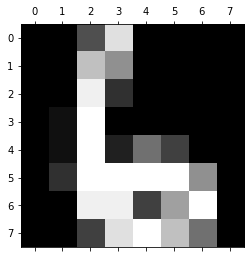

In [34]:
plt.matshow(digits.images[67])

In [35]:
digits.target[67]

6

In [36]:
logm.predict([digits.data[67]])

array([6])

In [39]:
preds = logm.predict(X_test)

### Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test, preds)
cm # you got 2 dimentional array, where there is number except diagon, model mispredicted. lets visualize it

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 39]], dtype=int64)

In [47]:
import seaborn as sns

Text(69.0, 0.5, 'y_test')

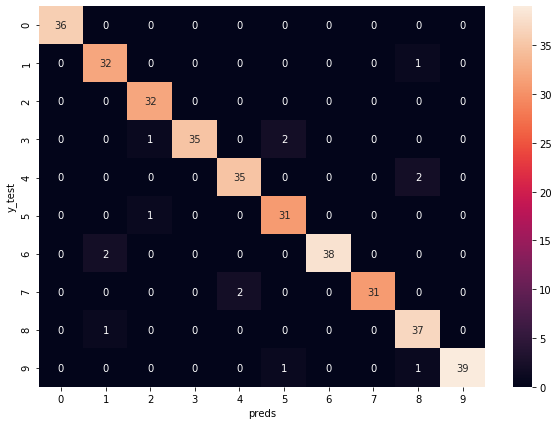

In [48]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("preds")
plt.ylabel("y_test")

In [54]:
from sklearn.datasets import load_iris 

In [55]:
iris = load_iris()

In [58]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [66]:
len(iris.data)

150

In [59]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [60]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X = iris.data
y = iris.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logm = LogisticRegression()

In [77]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
iris.target[0]

0

In [82]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [96]:
logm.predict([iris.data[0]])

array([0])

In [99]:
preds = logm.predict(X_test)
preds

array([0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 0, 0, 2, 1, 1, 2])

In [98]:
y_test

array([0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 0, 0, 2, 1, 1, 2])

In [100]:
import pandas as pd

In [104]:
df = pd.DataFrame(data = list(zip(preds,y_test)),  columns = ["preds", "y_test"] )

In [105]:
df

,preds,y_test
0,0,0
1,0,0
2,2,2
3,2,2
4,2,2
5,1,1
6,2,1
7,2,2
8,1,1
9,2,2


In [108]:
logm.score(X_test, y_test)

0.9666666666666667

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [113]:
cm = confusion_matrix(y_test, preds)
cm

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]], dtype=int64)

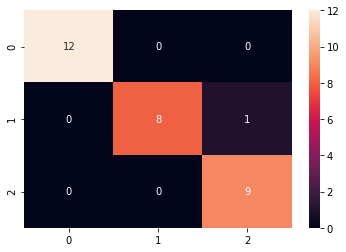

In [115]:
sns.heatmap(cm, annot = True)

In [118]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Owner/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

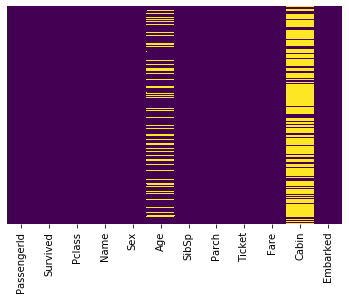

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

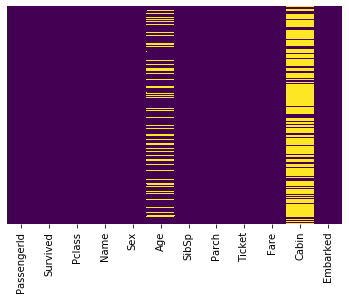

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
sns.set_style("whitegrid")

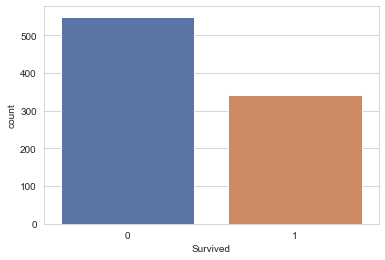

In [10]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data=df, palette="deep")

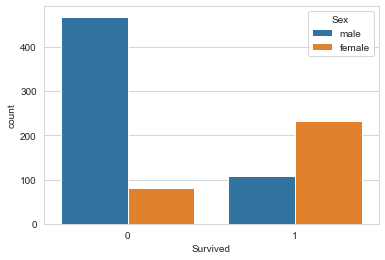

In [11]:
sns.countplot(x="Survived", hue="Sex", data=df)

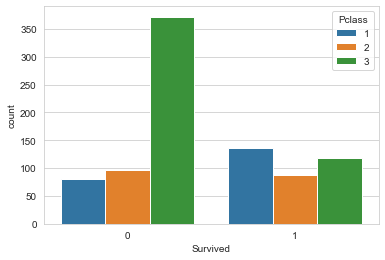

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=df)

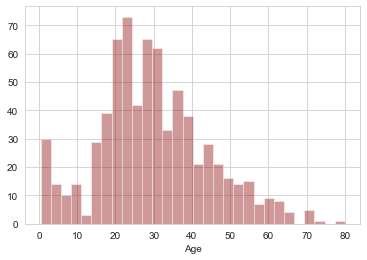

In [13]:
sns.distplot(df["Age"].dropna(), kde=False, color="darkred", bins=30)

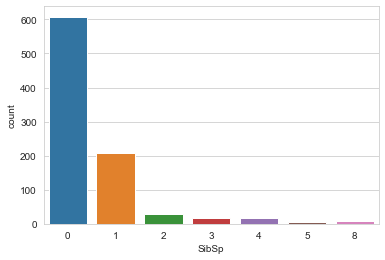

In [14]:
sns.countplot(x="SibSp", data=df)

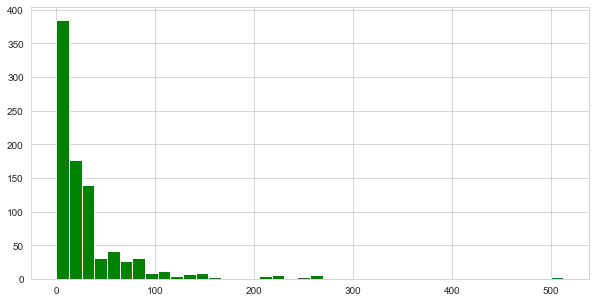

In [15]:
df["Fare"].hist(color="green", bins=40, figsize=(10,5))

In [16]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


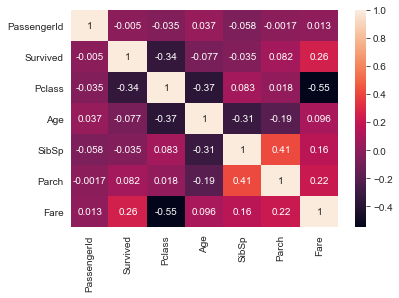

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
# conda install -c conda-forge cufflinks-py
import cufflinks as cf
cf.go_offline()

In [19]:
import cufflinks as cf

In [20]:
cf.go_offline()

In [21]:
df["Fare"].iplot(kind="hist", bins=30)#Returns a plotly chart either as inline chart, image of Figure object

# Data cleaning

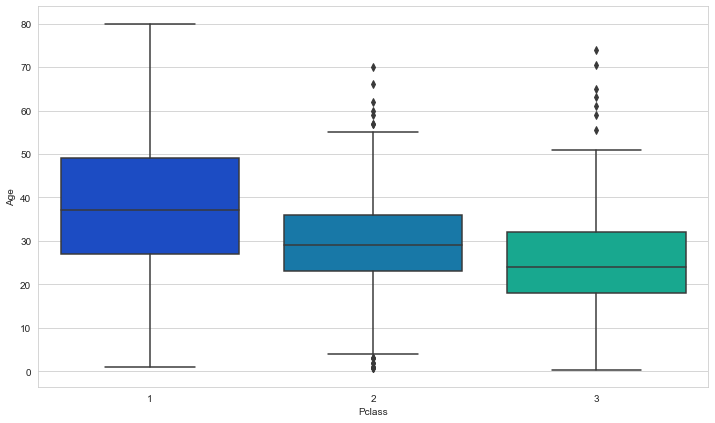

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=df, palette="winter")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:return 24
    else:return Age

In [25]:
# df.groupby("Pclass")["Age"].mean()
# df[["Age", "Pclass"]].head()

In [26]:
# # def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]
#     if pd.isnull(Age):
#         if Pclass == 1:
#             return 38
#         elif Pclass == 2:
#             return 29
#         else:return 25
#     else:return Age

In [27]:
# df["Age"]= df[["Age", "Pclass"]].apply(impute_age, axis=1)

In [28]:
# train['Age']=train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [29]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis=1)

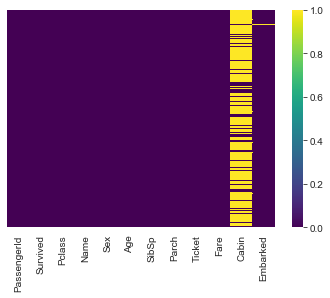

In [30]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [31]:
# train['Age']=train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [32]:
df.drop("Cabin", axis=1, inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
df.dropna(inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
sex=pd.get_dummies(df["Sex"], drop_first=True)
embark=pd.get_dummies(df["Embarked"], drop_first=True)

In [37]:
df.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [38]:
df=pd.concat([df,sex, embark], axis=1)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= df.drop("Survived", axis=1)
y=df["Survived"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Training

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()

In [45]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.score(X_test, y_test)

0.7940074906367042

In [47]:
y_pred= model.predict(X_test)

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())
print(scores)

Cross-Validation Accuracy Scores 0.7975783475783476
[0.88888889 0.81481481 0.81481481 0.7037037  0.92592593 0.81481481
 0.66666667 0.69230769 0.88461538 0.76923077]


# evaluation

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       167
           1       0.74      0.70      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



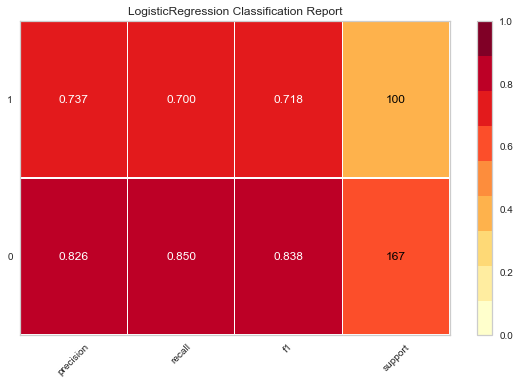

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [52]:
cnf_matrix=confusion_matrix(y_pred, y_test)

In [53]:
cnf_matrix

array([[142,  30],
       [ 25,  70]], dtype=int64)

Text(0.5, 29.5, 'Actual Label')

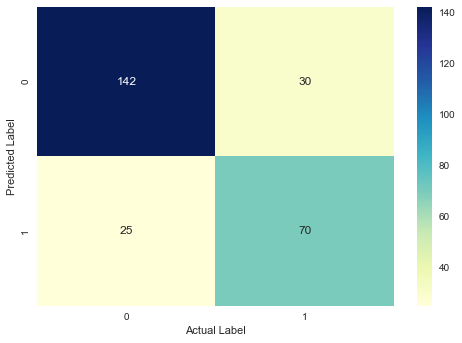

In [54]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')